In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn
import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

tf.disable_v2_behavior()

In [2]:
# Import data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [3]:
print(titanic_train.columns)
print(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Check missing values
print(titanic_train.isnull().any())
print(titanic_test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [6]:
# Clean missing values Cleansing
#titanic_test.fillna(0,inplace=True)
titanic_train.interpolate(method='linear', limit_direction='both', inplace=True)
titanic_train.fillna('Unknown',inplace=True)
titanic_test.interpolate(method='linear', limit_direction='both', inplace=True)
titanic_test.fillna('Unknown',inplace=True)

In [7]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age            155
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Encode categorical features
categorical_feature_mask = titanic_train.dtypes==object
categorical_cols = titanic_train.columns[categorical_feature_mask].tolist()

# Encode categorical features
le = LabelEncoder()

# apply le on categorical feature columns
titanic_train[categorical_cols] = titanic_train[categorical_cols].apply(lambda col: le.fit_transform(col))
titanic_train[categorical_cols].head(10)

categorical_feature_mask_test = titanic_test.dtypes==object
categorical_cols_test = titanic_test.columns[categorical_feature_mask_test].tolist()

# Encode categorical features
le = LabelEncoder()

# apply le on categorical feature columns
titanic_test[categorical_cols_test] = titanic_test[categorical_cols_test].apply(lambda col: le.fit_transform(col))
titanic_test[categorical_cols_test].head(10)

,Name,Sex,Ticket,Cabin,Embarked
0,206,1,152,76,1
1,403,0,221,76,2
2,269,1,73,76,1
3,408,1,147,76,2
4,178,0,138,76,2
5,366,1,261,76,2
6,84,0,158,76,1
7,57,1,84,76,2
8,4,0,100,76,0
9,103,1,269,76,2


In [11]:
# Split data into X and y
X_train = titanic_train.drop(['Survived'], axis=1)
y_train = titanic_train[['Survived']]

X_test = titanic_test

In [12]:
# Build Neural Network
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [13]:
model = build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Shows training progress, printing a single point for each epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
995,0.245675,0.912921,2.915359,0.720670,995
996,0.198187,0.919944,2.911890,0.675978,996
997,0.112680,0.962079,3.031246,0.648045,997
998,0.104722,0.966292,2.945149,0.698324,998
999,0.109301,0.959270,2.898593,0.675978,999


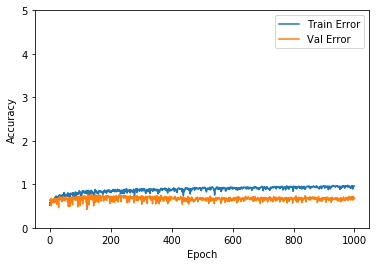

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

plot_history(history)


............................................

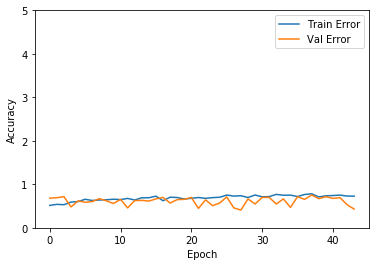

In [18]:
model = build_model()

# The patience parameter is the number of epochs to check the improvements
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [19]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    #validation_data=(x_val, y_val),
                    verbose=1)

Train on 891 samples
Epoch 1/40
891/891 [==============================] - 0s 9us/sample - loss: 1.0305 - acc: 0.5769
Epoch 2/40
891/891 [==============================] - 0s 9us/sample - loss: 0.9447 - acc: 0.6981
Epoch 3/40
891/891 [==============================] - 0s 9us/sample - loss: 0.8330 - acc: 0.7127
Epoch 4/40
891/891 [==============================] - 0s 8us/sample - loss: 0.8180 - acc: 0.6790
Epoch 5/40
891/891 [==============================] - 0s 9us/sample - loss: 0.5794 - acc: 0.7643
Epoch 6/40
891/891 [==============================] - 0s 8us/sample - loss: 0.7133 - acc: 0.7363
Epoch 7/40
891/891 [==============================] - 0s 9us/sample - loss: 0.5579 - acc: 0.7598
Epoch 8/40
891/891 [==============================] - 0s 8us/sample - loss: 0.5725 - acc: 0.7396
Epoch 9/40
891/891 [==============================] - 0s 10us/sample - loss: 0.5534 - acc: 0.7722
Epoch 10/40
891/891 [==============================] - 0s 8us/sample - loss: 0.5151 - acc: 0.7834
Epoch 1

In [20]:
test_predictions = model.predict(X_test)

In [21]:
a = test_predictions > 0.5
b = a.astype(int)

In [22]:
output = pd.DataFrame(X_test['PassengerId'])
output['Survived'] = b
output.head(10)

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [23]:
output = output[:418]

In [24]:
# Export final results
file_name = 'my_submission_oliveia.csv'
output.to_csv(file_name,index=False)
print('Saved file: ' + file_name)

Saved file: my_submission_oliveia.csv
